In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import pickle
import requests

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
tf.get_logger().setLevel('ERROR')

from tensorflow.keras.applications.inception_v3 import preprocess_input, InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
inception_model = InceptionV3(include_top = False)
model = tf.keras.models.load_model(r"image-captioning-model.keras")
with open('tokenizer.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

In [3]:
def idx_to_word(word_number, tokenizer):
    """
    Input:
    word_number --> the number used to 
    """
    for word, index in tokenizer.word_index.items():
        if index == word_number:
            return word
    return None

In [4]:
def predict_caption(model, image, tokenizer, max_length = 74):
    in_text = "startseq"
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose = 0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        
        in_text += " " + word
        
        if word is None:
            break
        
        if word == "endseq":
            break
    return in_text

In [5]:
def extract_features(image_path, type="local"):
    if type == "local":
        image = load_img(image_path, target_size=(224, 224))

    else:
        response = requests.get(image_path, stream = True)
        image = Image.open(response.raw)
    
    image = img_to_array(image)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = preprocess_input(image)
    feature = inception_model.predict(image, verbose = 0)
    return feature

In [6]:
def get_caption(image, model, tokenizer, max_length = 74, type = 'local'):
    feature = extract_features(image, type = type)
    y_pred = predict_caption(model, feature, tokenizer, max_length)
    print("Predicted Caption: ", y_pred[9:-7])
    
    if type == 'local':
        img = mpimg.imread(image)
    else:
        response = requests.get(image, stream=True)
        img = mpimg.imread(response.raw)
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

Predicted Caption:  two men playing soccer in the grass


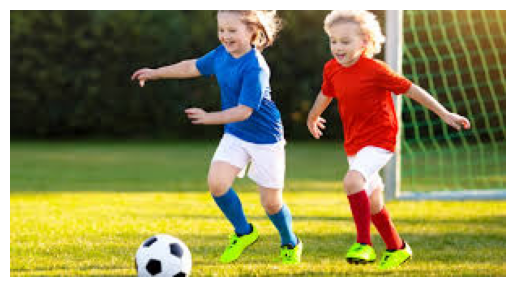

In [7]:
get_caption("image1.jpeg", model = model, tokenizer = tokenizer)

Predicted Caption:  man in black shirt is walking down the street


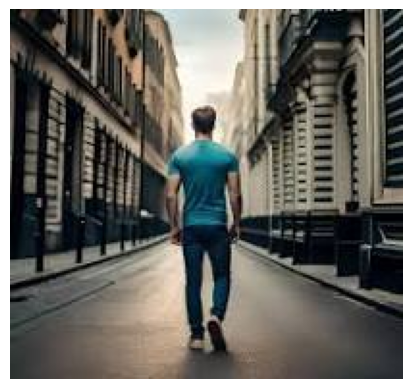

In [8]:
get_caption("image2.jpeg", model = model, tokenizer = tokenizer)

Predicted Caption:  man in blue shirt is sitting on bench


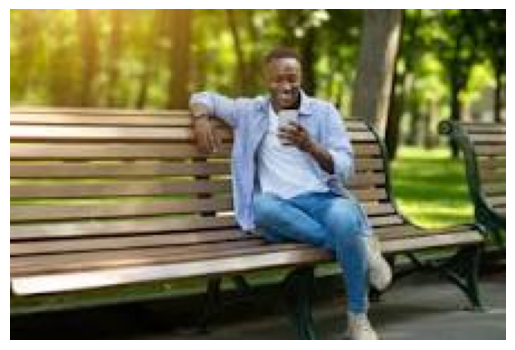

In [9]:
get_caption("image3.jpeg", model = model, tokenizer = tokenizer)

Predicted Caption:  two dogs are running through the grass


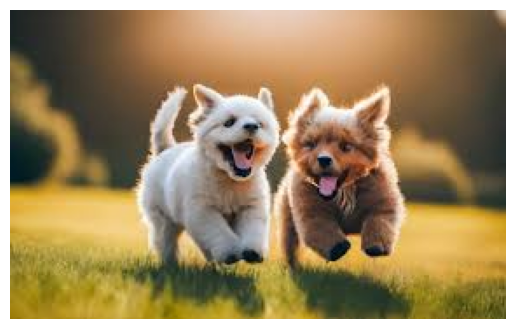

In [16]:
get_caption(r"dogs_running.jpeg", model = model, tokenizer = tokenizer)